# **Exploratory Analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Cancer_Data.csv')  

print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
print(df.size)
df.shape

18777


(569, 33)

## Cleaning the Data

In [5]:
#Null values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Dropping unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
#Duplicated values
df.duplicated().sum()

np.int64(0)

In [9]:
#Unique Values
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

## Feature Descriptions

Each sample in the dataset represents characteristics of a cell nucleus derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. The features describe various properties of the cell nuclei and are grouped as follows:

### Target Variable

diagnosis: Diagnosis of breast tissues (M = malignant, B = benign).

### Features (Computed over all nuclei in the image)

- radius: Average distance from the center to points on the perimeter.

- texture: Standard deviation of gray-scale values (image smoothness).

- perimeter: Mean size of the nucleus boundary.

- area: Mean area of the nucleus.

- smoothness: Local variation in radius lengths.

- compactness: (Perimeter² / Area - 1.0); a measure of shape compactness.

- concavity: Severity of concave portions of the contour.

- concave points: Number of concave portions on the contour.

- symmetry: Symmetry of the cell nucleus.

- fractal_dimension: Complexity of the contour (fractal dimension).

The mean, standard error (SE), and worst (or largest value) of these features were computed for each image, resulting in 30 features.



In [10]:
df['diagnosis_str'] = df['diagnosis']
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print(df['diagnosis'].value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


In [11]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/tmp/ipykernel_7232/385966714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis_str', data=df, palette='Set2')


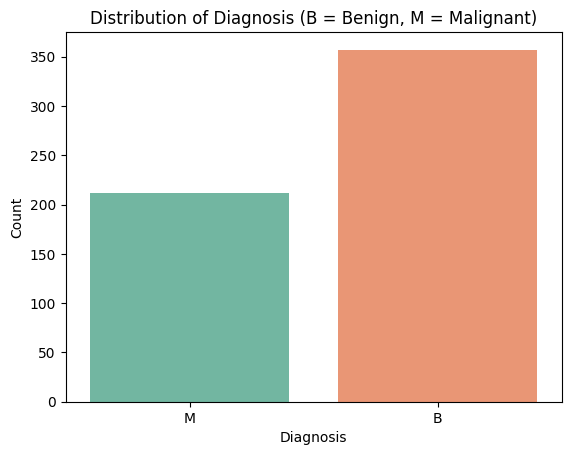

B: 62.74%
M: 37.26%


In [20]:
# Visualize the distribution of the target variable
sns.countplot(x='diagnosis_str', data=df, palette='Set2')
plt.title('Distribution of Diagnosis (B = Benign, M = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

counts = df['diagnosis_str'].value_counts(normalize=True) * 100
for label, pct in counts.items():
    print(f"{label}: {pct:.2f}%")

This class imbalance is moderate, we have to keep this in mind during modeling because the model could be biased towards the majority class.

## Data Visualization

### Histogram of features


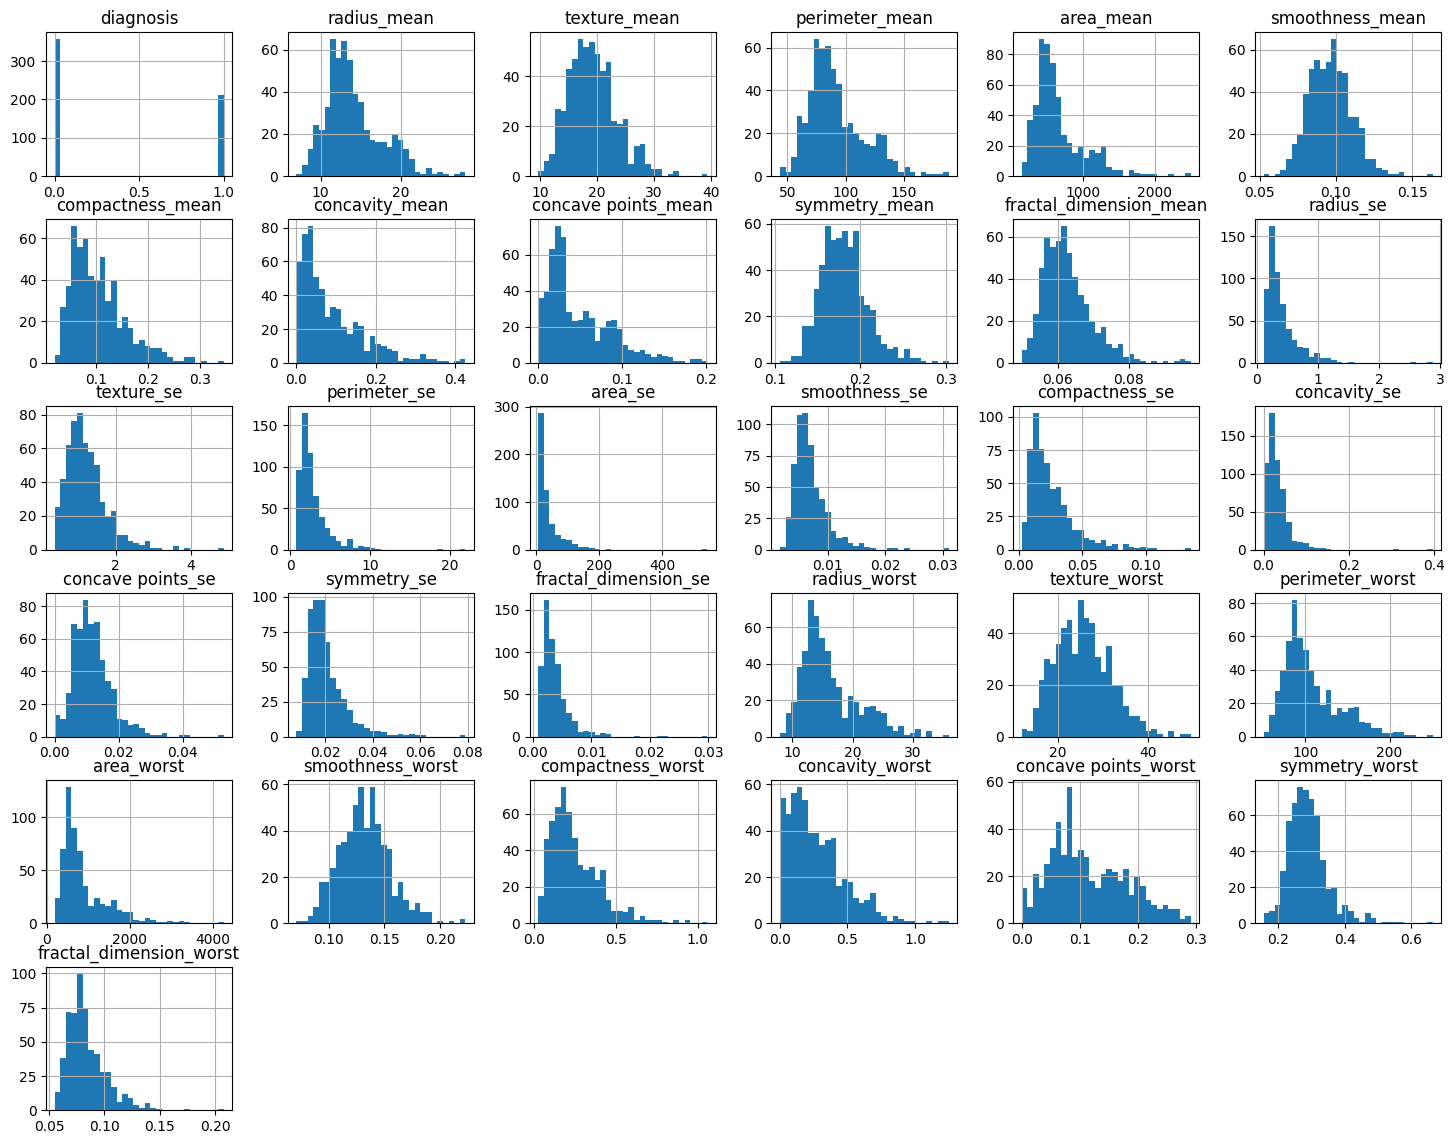

In [13]:
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(18, 14))
plt.show()


### Correlation heatmap

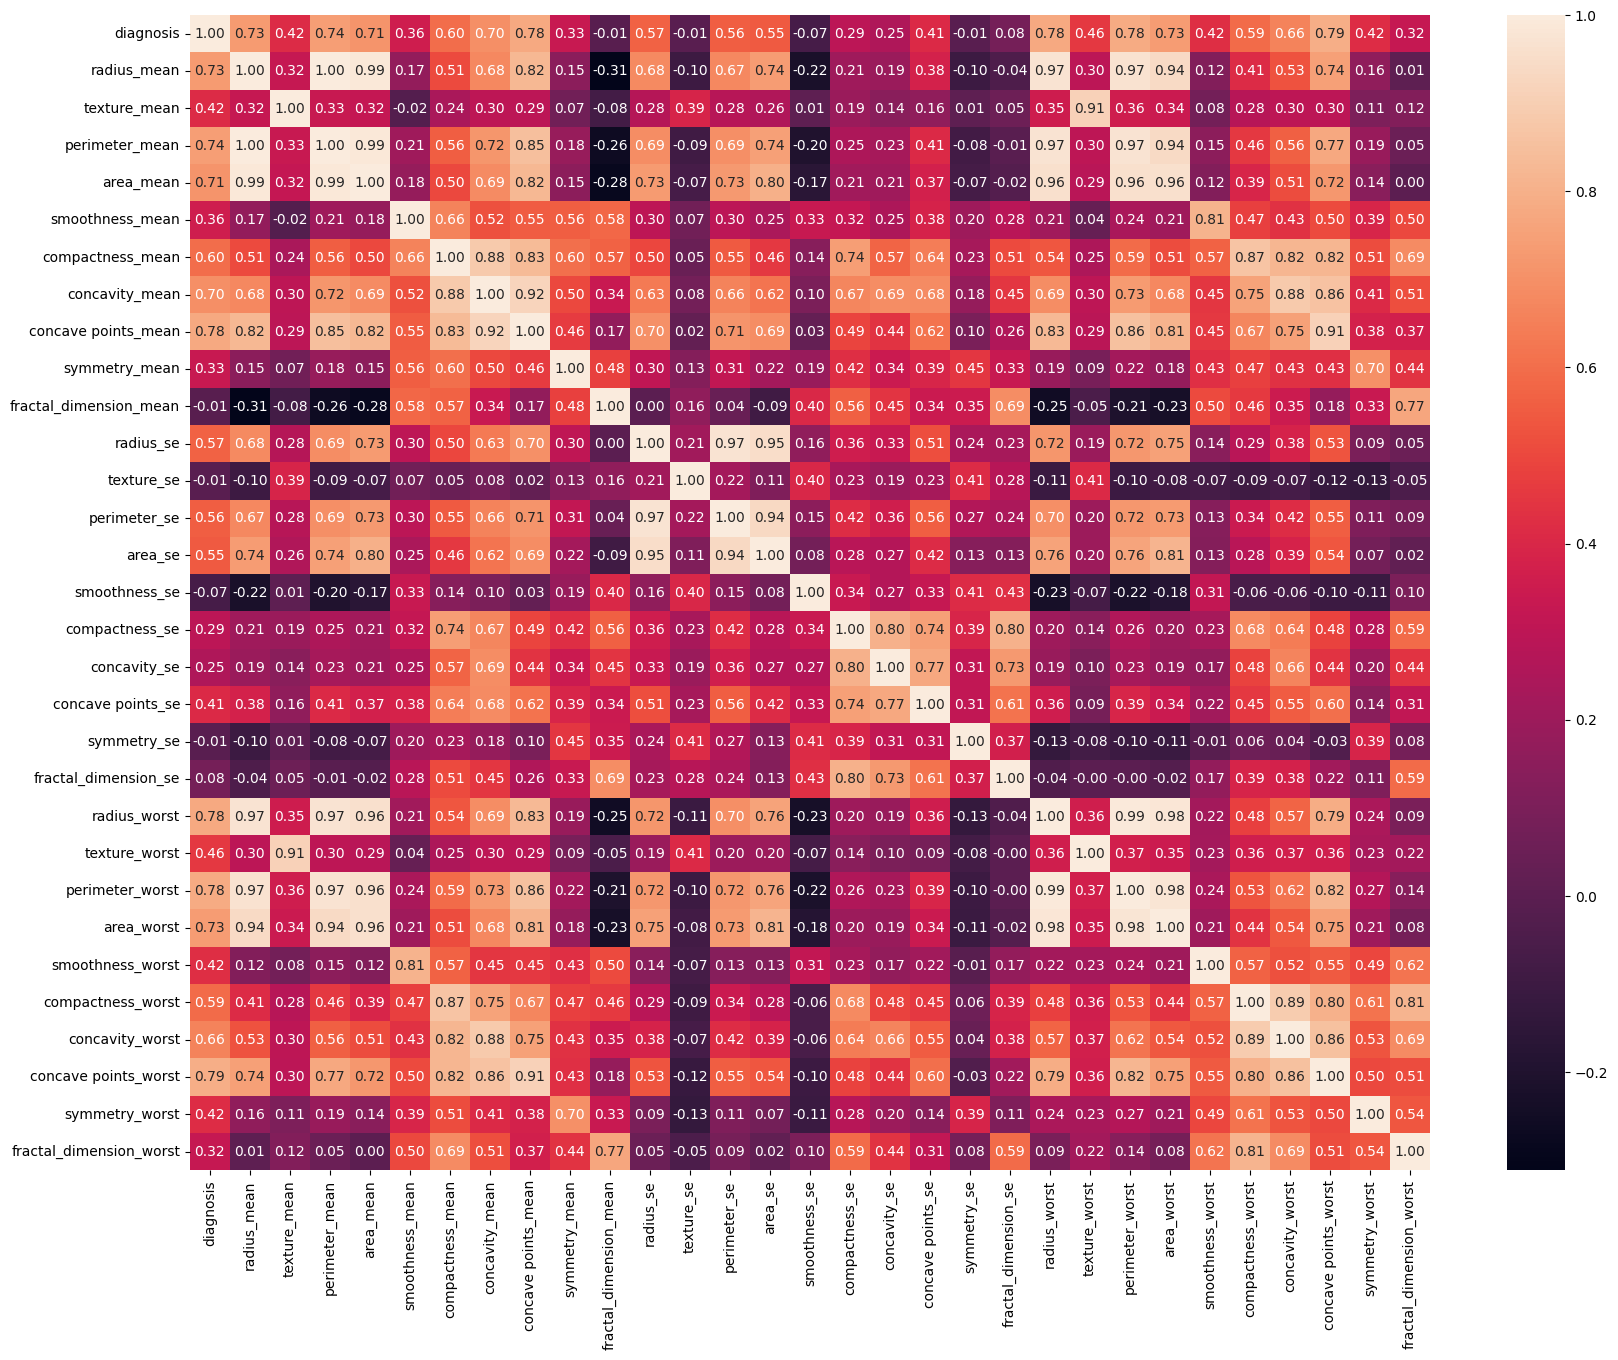

In [14]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f")
plt.show()

### Barplot for Correlation between diagnosis and features

/tmp/ipykernel_7232/809618985.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


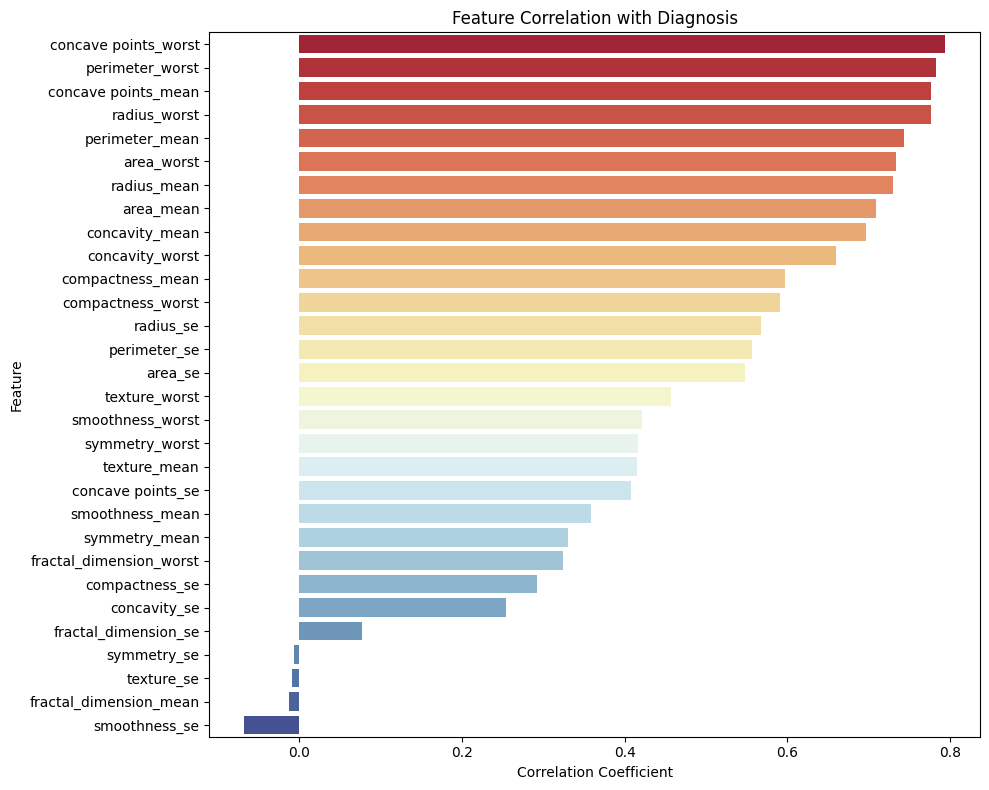

In [15]:
# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_with_target = numeric_df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)

plt.figure(figsize=(10, 8))

# Use a diverging color palette to better distinguish high from low correlation

colors = sns.color_palette("RdYlBu", n_colors=len(correlation_with_target))
sns.barplot(
    x=correlation_with_target.values,
    y=correlation_with_target.index,
    palette=colors
)
plt.title('Feature Correlation with Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Box-plot & Swarm-plot

### Mean features

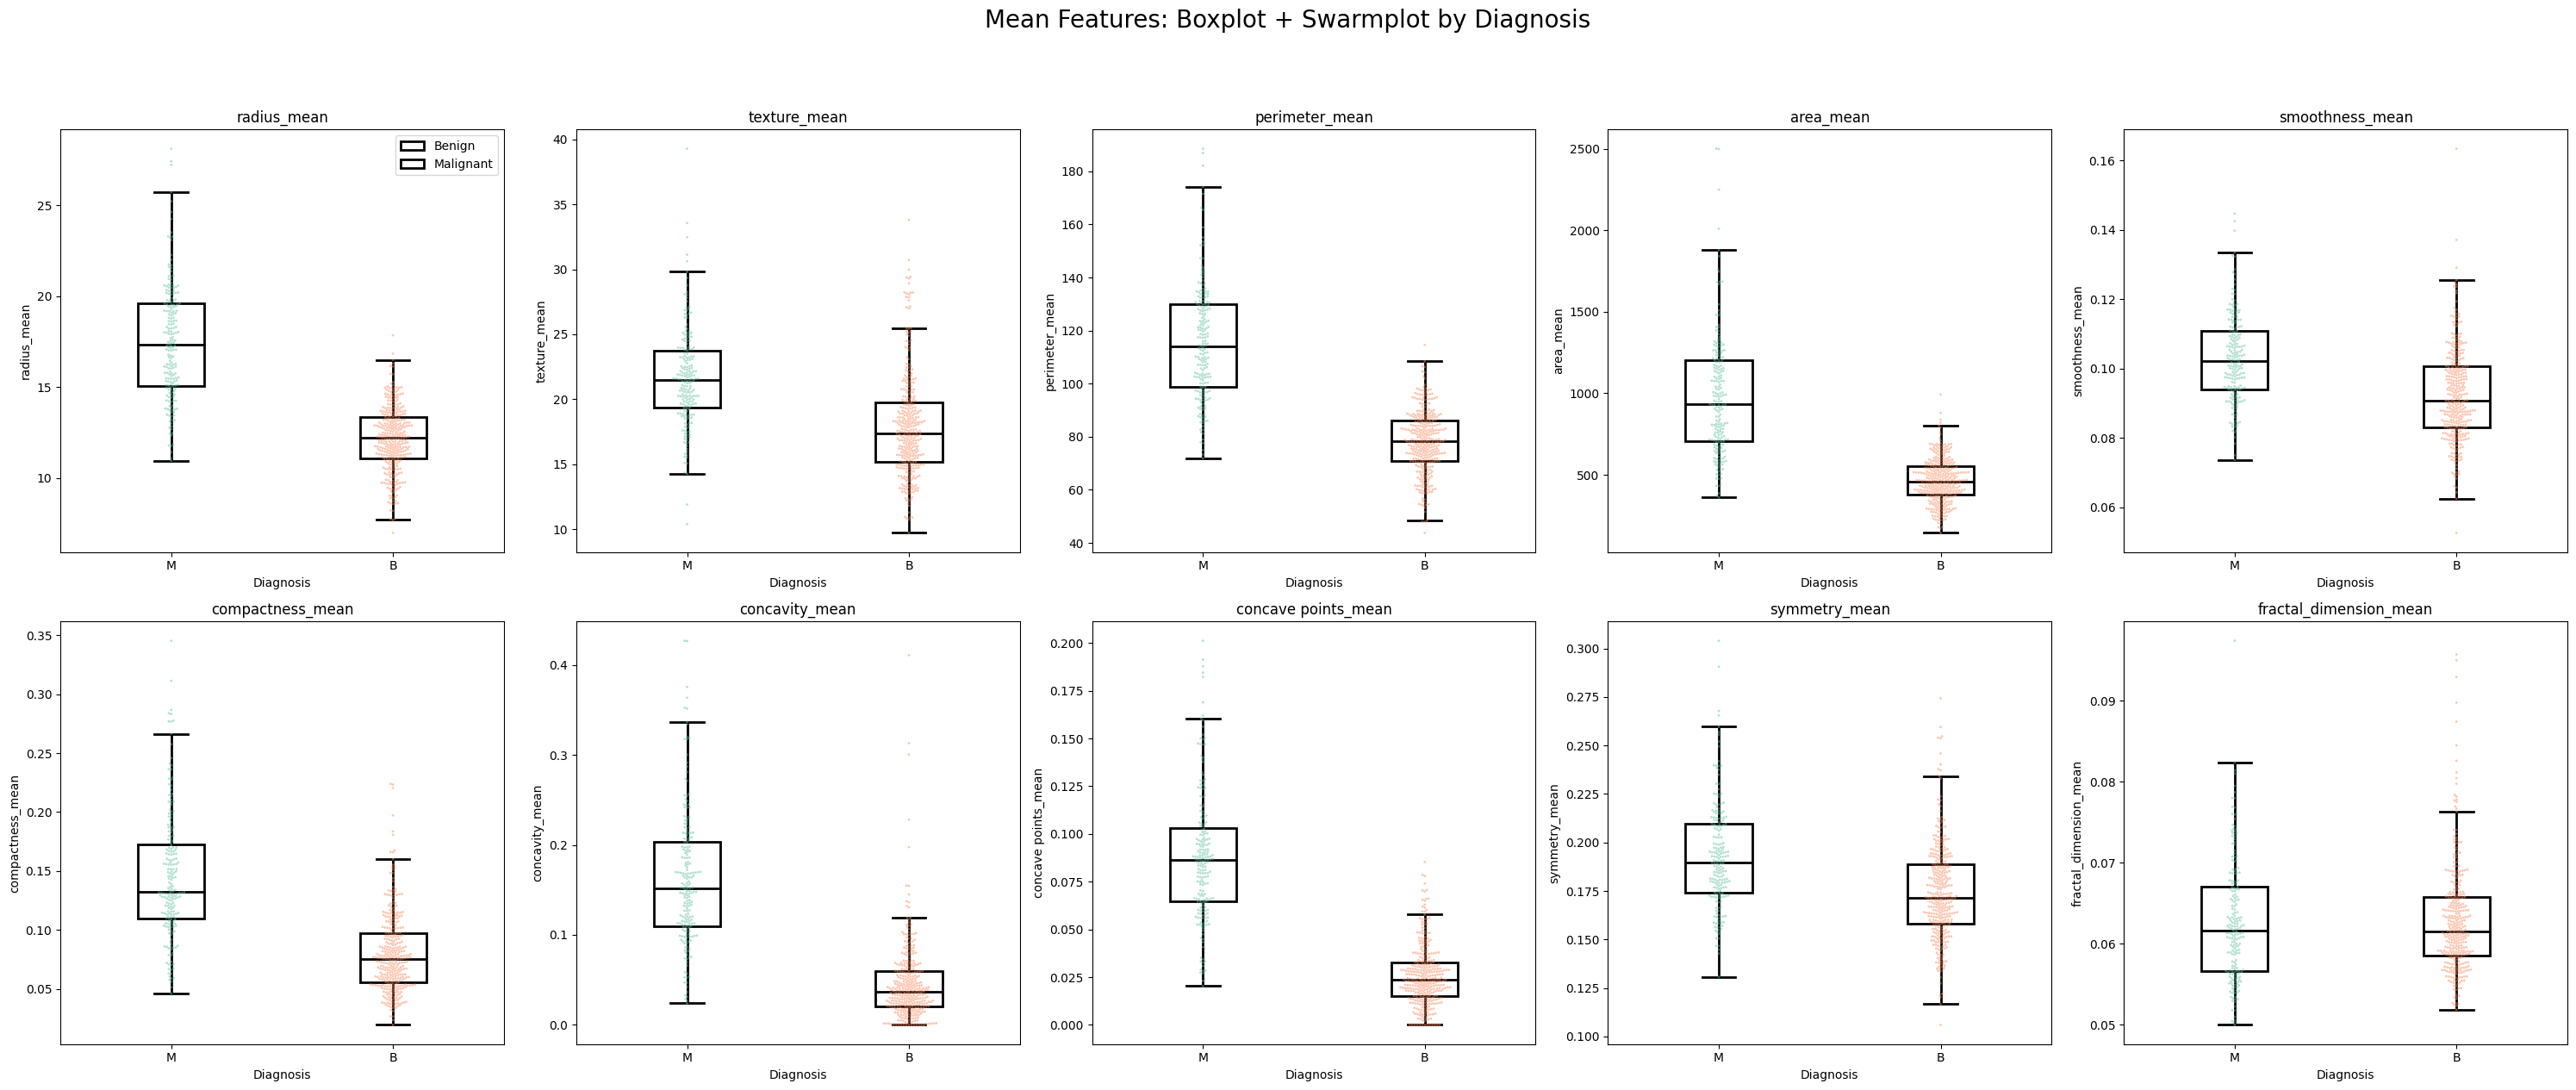

In [16]:
plt.figure(figsize=(30, 12))
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean',
    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]
for n, feature in enumerate(mean_features, 1):
    plt.subplot(2, 5, n)
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
    sns.boxplot(
        data=df, x='diagnosis_str', y=feature, hue='diagnosis_str', width=0.3, showcaps=True,
        boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
        whiskerprops=dict(color='black', linewidth=2),
        capprops=dict(color='black', linewidth=2),
        medianprops=dict(color='black', linewidth=2),
        showfliers=False, palette='Set2', legend=False
    )
    sns.swarmplot(
    data=df, x='diagnosis_str', y=feature, hue='diagnosis_str',
    palette='Set2', dodge=False, alpha=0.5, legend=False, size=2
)
    plt.title(feature)
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    if n == 1:
        plt.legend(['Benign', 'Malignant'])
    else:
        plt.legend([],[], frameon=False)
plt.suptitle('Mean Features: Boxplot + Swarmplot by Diagnosis', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()



It is shown above that across several key features—such as radius_mean, perimeter_mean, area_mean, and concavity_mean—malignant tumors consistently exhibited significantly higher values compared to benign counterparts.

Biological Significance:

Malignant cells often display increased size and irregular shapes due to uncontrolled proliferation and defective cellular architecture. The larger means in features such as area and perimeter reflect this hypertrophy and structural abnormality, hallmarks of neoplastic transformation.

### SE features

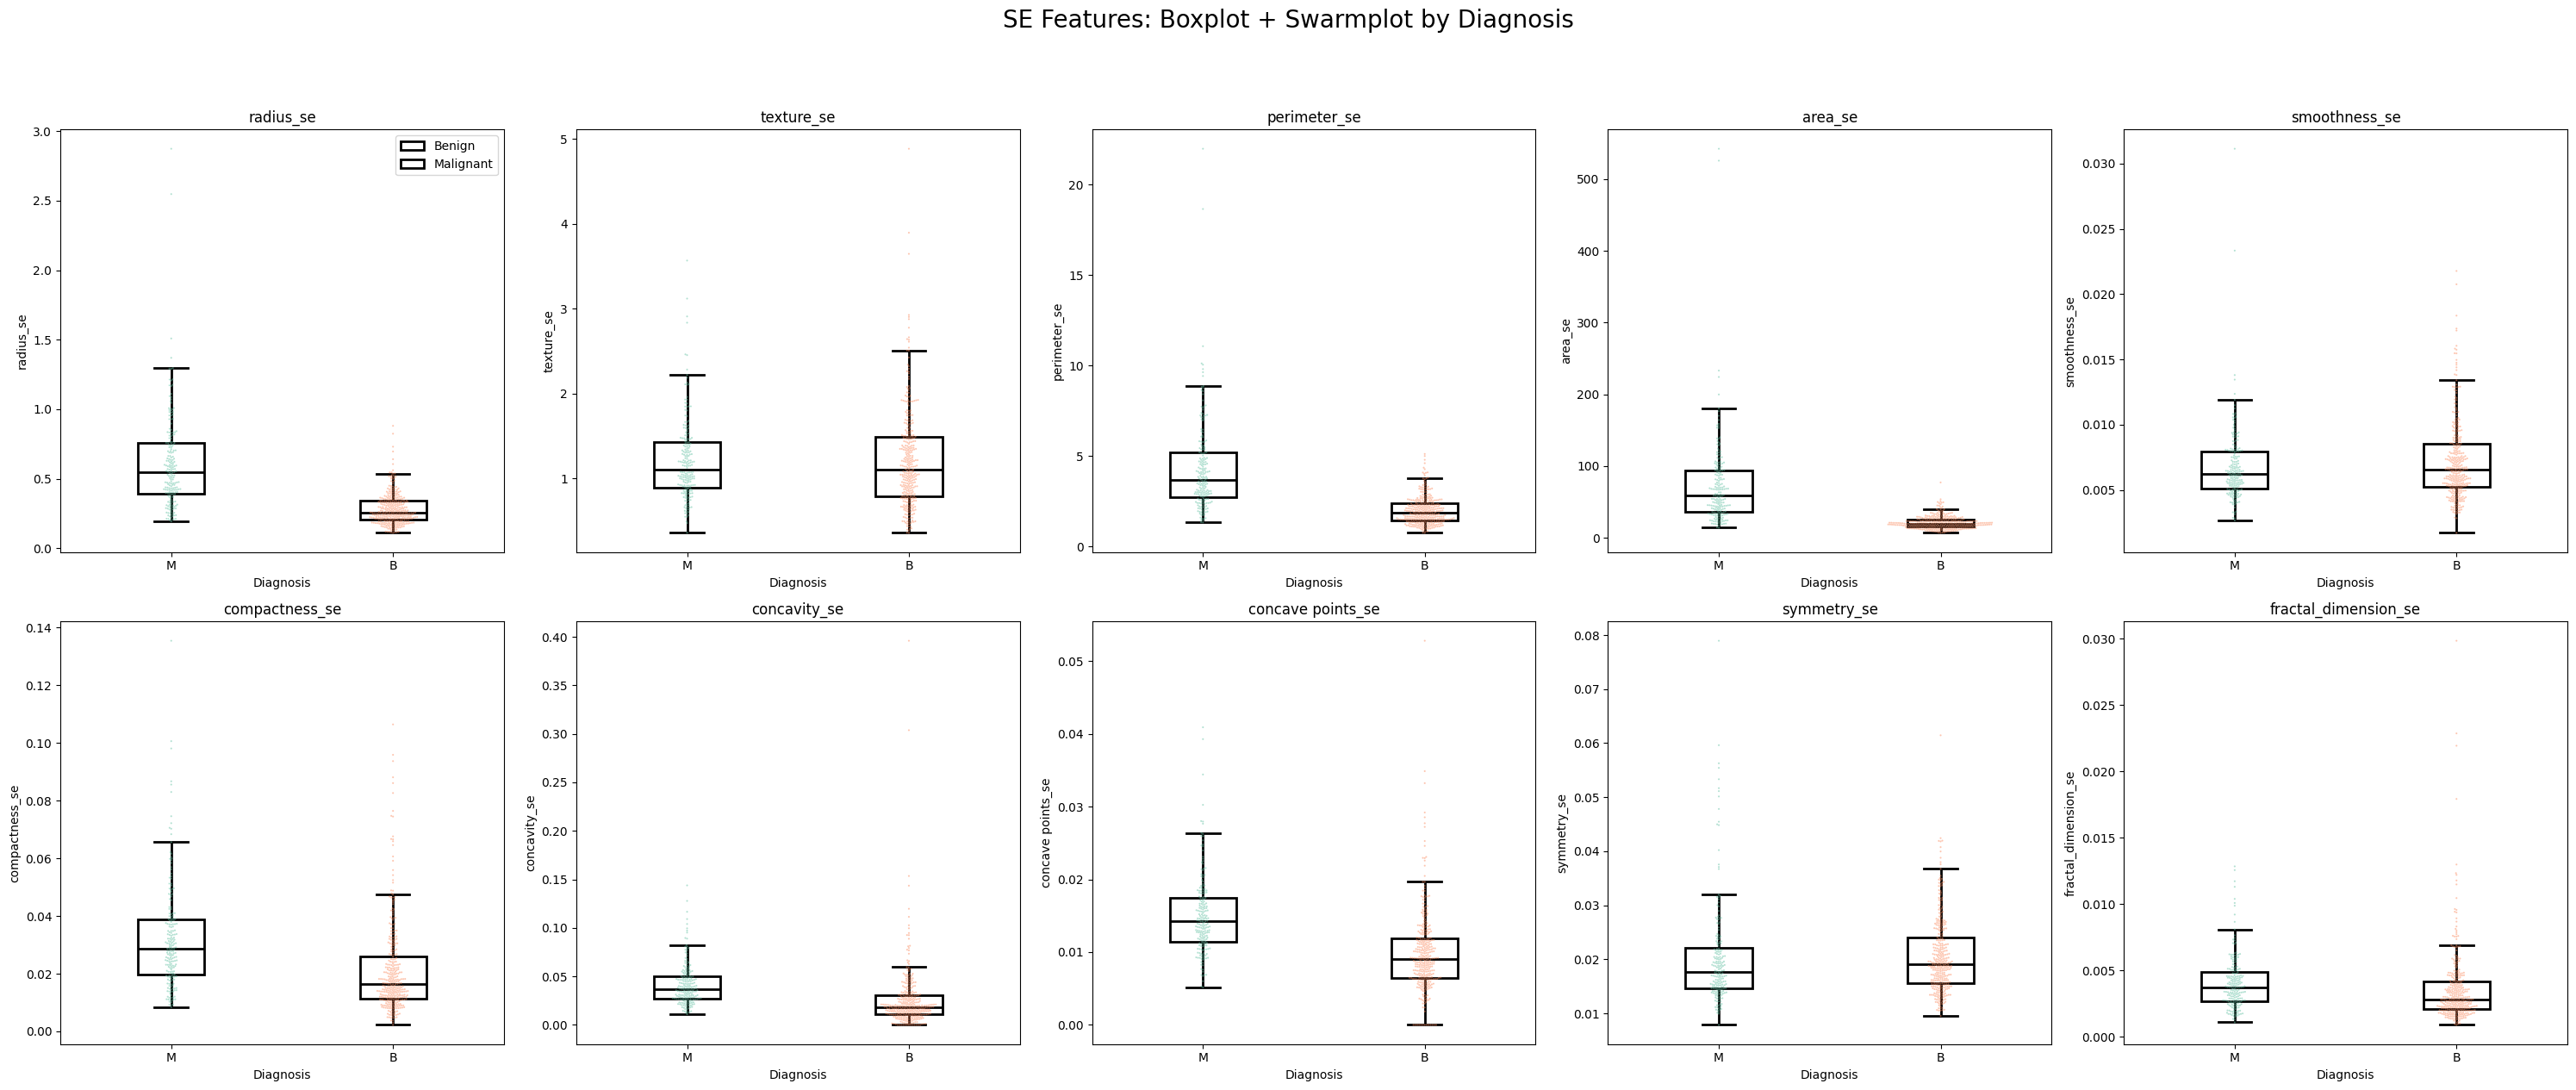

In [17]:
# --- SE features ---
plt.figure(figsize=(30, 12))
se_features = [
    'radius_se', 'texture_se', 'perimeter_se',
    'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se'
]
for n, feature in enumerate(se_features, 1):
    plt.subplot(2, 5, n)
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
    sns.boxplot(
        data=df, x='diagnosis_str', y=feature, hue='diagnosis_str', width=0.3, showcaps=True,
        boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
        whiskerprops=dict(color='black', linewidth=2),
        capprops=dict(color='black', linewidth=2),
        medianprops=dict(color='black', linewidth=2),
        showfliers=False, palette='Set2', legend=False
    )
    sns.swarmplot(
    data=df, x='diagnosis_str', y=feature, hue='diagnosis_str',
    palette='Set2', dodge=False, alpha=0.5, legend=False, size=1.5
)
    plt.title(feature)
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    if n == 1:
        plt.legend(['Benign', 'Malignant'])
    else:
        plt.legend([],[], frameon=False)
plt.suptitle('SE Features: Boxplot + Swarmplot by Diagnosis', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

Although the differences were subtler than in the mean or worst-case features, malignant tumors demonstrated moderately elevated standard errors in features like radius_se, area_se, and concavity_se.

Biological Significance:

Higher SE in malignant cases suggests increased heterogeneity in cell populations, which is a known indicator of tumor aggression. Tumor cell heterogeneity results from genomic instability and aberrant differentiation, contributing to variation in size and structure even within the same sample.

### Worst features

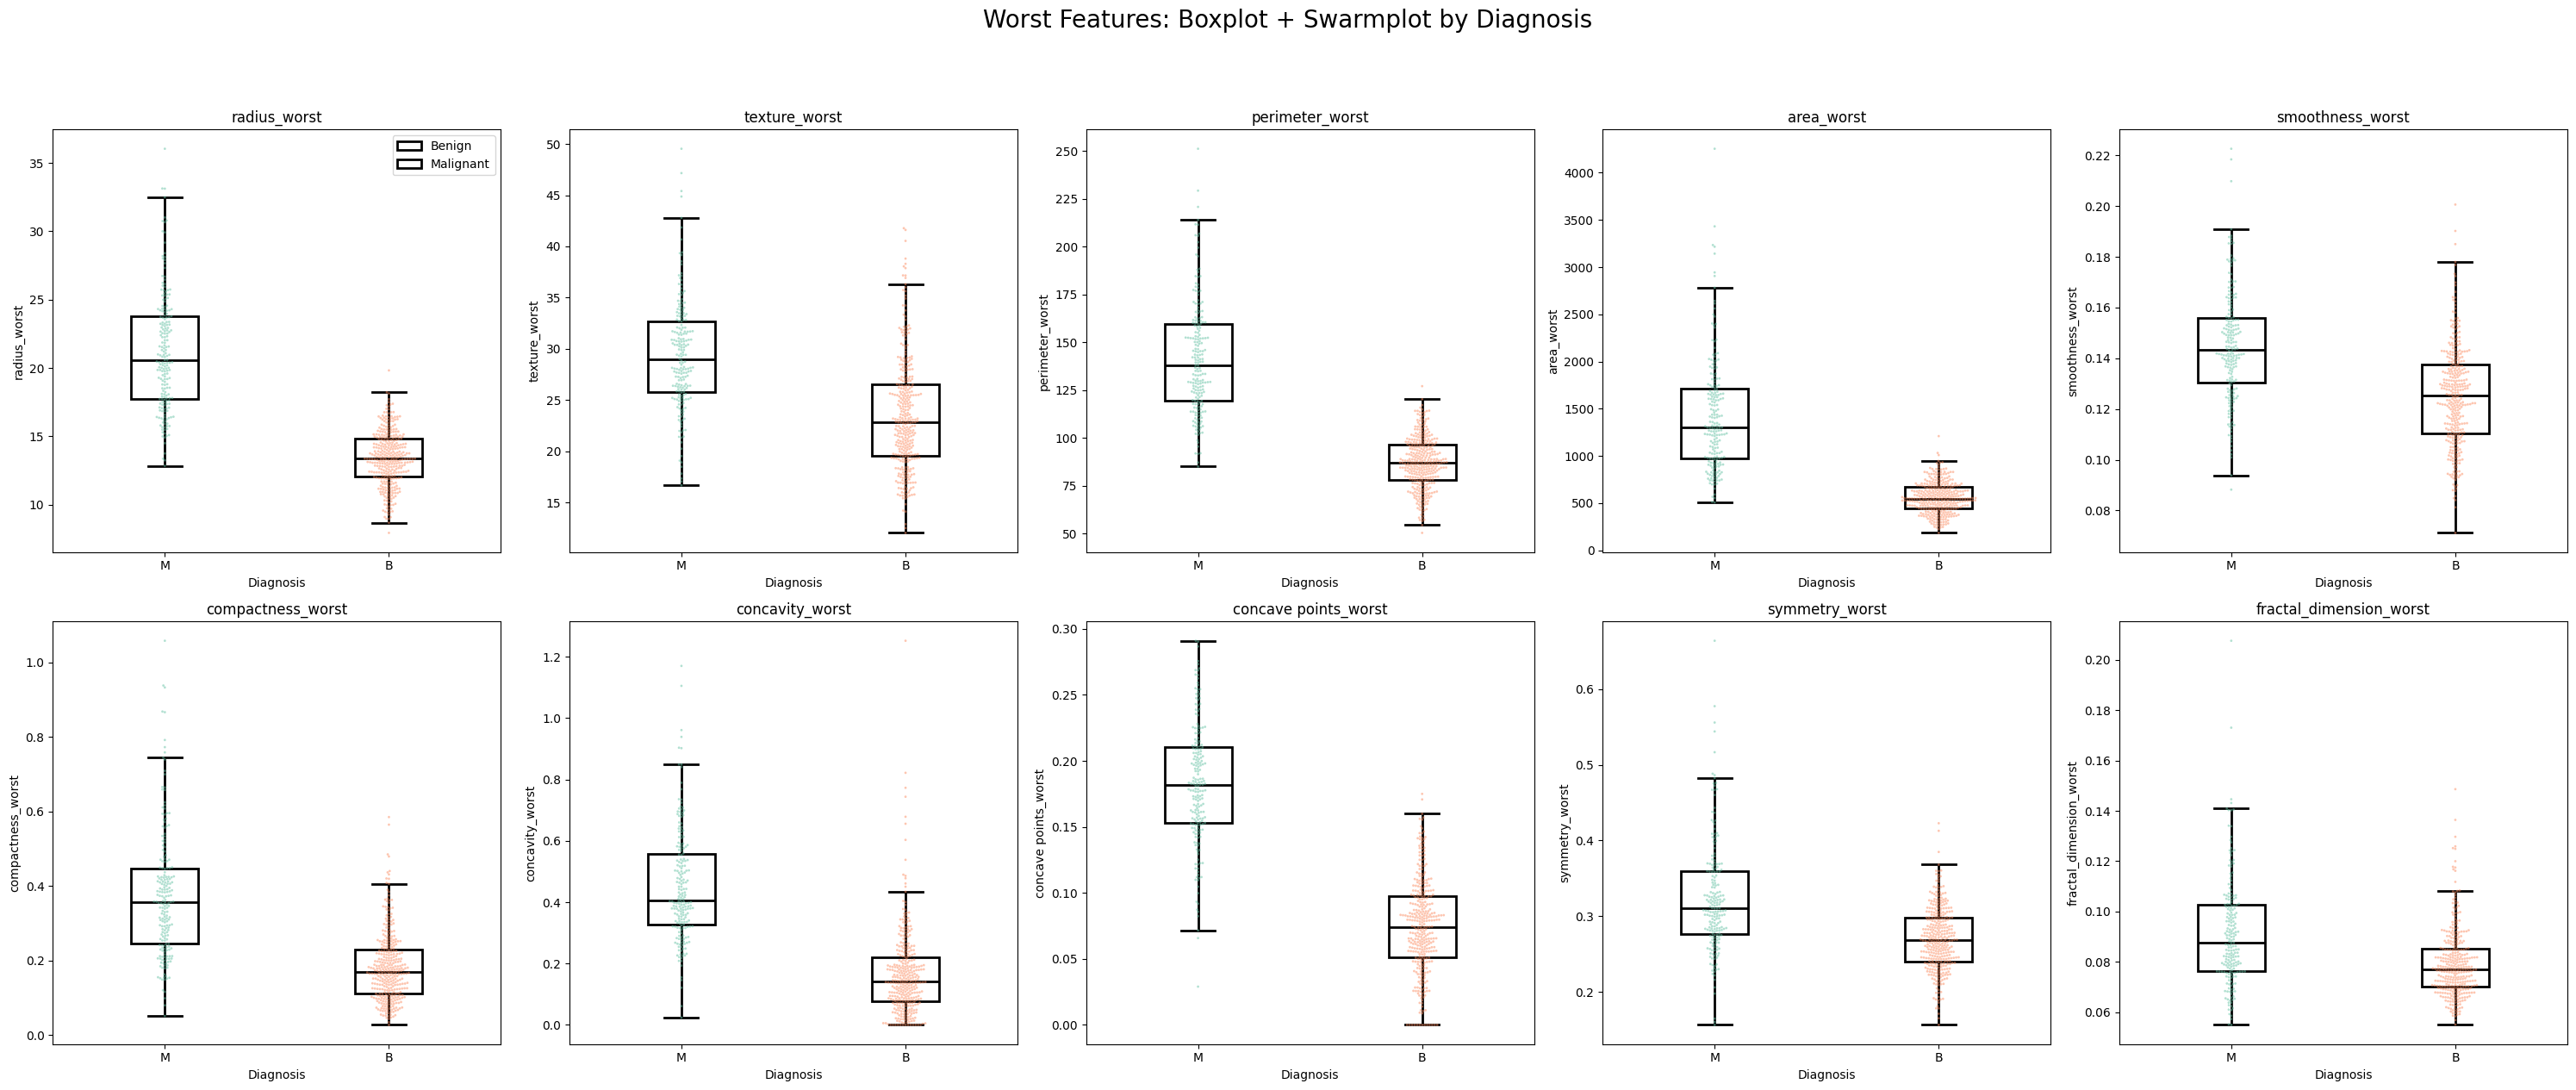

In [18]:
plt.figure(figsize=(30, 12))
worst_features = [
    'radius_worst', 'texture_worst', 'perimeter_worst',
    'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
for n, feature in enumerate(worst_features, 1):
    plt.subplot(2, 5, n)
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
    sns.boxplot(
        data=df, x='diagnosis_str', y=feature, hue='diagnosis_str', width=0.3, showcaps=True,
        boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
        whiskerprops=dict(color='black', linewidth=2),
        capprops=dict(color='black', linewidth=2),
        medianprops=dict(color='black', linewidth=2),
        showfliers=False, palette='Set2', legend=False
    )
    sns.swarmplot(
    data=df, x='diagnosis_str', y=feature, hue='diagnosis_str',
    palette='Set2', dodge=False, alpha=0.5, legend=False, size=2
)
    plt.title(feature)
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    if n == 1:
        plt.legend(['Benign', 'Malignant'])
    else:
        plt.legend([],[], frameon=False)
plt.suptitle('Worst Features: Boxplot + Swarmplot by Diagnosis', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

Malignant tumors showed dramatically elevated worst-case values across almost all features, with particularly strong separation from benign cases in concavity_worst, concave points_worst, and area_worst.

Biological Significance:

These extreme values likely reflect the presence of highly abnormal or pleomorphic cells, which are often associated with advanced malignancy. The detection of such outliers is critical, as a single atypical cell can signify a more aggressive or invasive tumor phenotype.